# Linear regression like R

In [2]:
import tensorflow as tf
import numpy as np
import hashlib
from matplotlib import pyplot as plt

### Initializing for input arguments

In [3]:
n_data = 1000
np.random.seed(n_data)
X_shape = n_data, 50
y_shape = n_data, 5
initial_X = np.random.randn(*X_shape)
true_weightes = np.random.randn(X_shape[1], y_shape[1])
true_biases = np.random.randn(1, y_shape[1])
initial_y = initial_X.dot(true_weightes)+true_biases

### Input arguments

In [11]:
n_iter = 50
seed_key = "seohasong"
default_keys = ["opt"]
graph_keys = ["loss"]
print_keys = []
X, y = initial_X, initial_y
batch_size = 50

### Learning with tensorflow

In [12]:
def get_batch(X_batch, y_batch):
    indices = np.random.choice(range(len(X)), batch_size)
    feed_dict = {
        X_batch: X[indices],
        y_batch: y[indices]
    }
    return feed_dict

seed = int(hashlib.sha1(seed_key.encode("utf8")).hexdigest()[10], 16)
np.random.seed(seed)

g = tf.Graph()
with g.as_default():
    
    tf.set_random_seed(seed)
    X_batch = tf.placeholder(dtype=tf.float32, shape=(None, X.shape[1]))
    y_batch = tf.placeholder(dtype=tf.float32, shape=(None, y.shape[1]))
    weights = tf.Variable(tf.random_uniform([X.shape[1], y.shape[1]]))
    biases = tf.Variable(tf.random_uniform([1, y.shape[1]]))
    
    output = tf.matmul(X_batch, weights)+biases
    loss = tf.reduce_mean((output-y_batch)**2)
    opt = tf.train.AdamOptimizer(0.1, 0.9).minimize(loss)

keys = set(default_keys+graph_keys+print_keys)
log = {key: [] for key in keys}
    
with tf.Session(graph=g) as sess:
    interesting = ", ".join(keys)
    sess.run(tf.global_variables_initializer())
    for i in range(n_iter):
        values = (sess.run(eval(interesting),
                           feed_dict=get_batch(X_batch, y_batch)))
        for i, key in enumerate(keys):
            log[key].append(values[i])

### Report

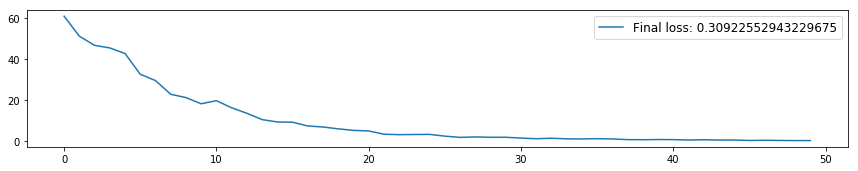

In [13]:
m = 0.05
n_row, n_col = len(graph_keys), 1
w, h = (1-m)/n_col, (1-m)/n_row
plot = {key: None for key in print_keys+graph_keys}
plt.figure(figsize=(12, 2*len(graph_keys)))
for i, key in enumerate(graph_keys):
    values = log[key]
    plot[key] = plt.axes([m, m+h*(i), w, h])
    plot[key].plot(values)
    legend = "Final {}: {}".format(key, values[-1])
    plot[key].legend([legend], fontsize=12)
    if i:
        plot[key].get_xaxis().set_visible(False)
plt.show()

report_template = """
{key}
-------------
{value}"""
text = "\n".join(
    [report_template.format(key=key, value=log[key][-1])
     for i, key in enumerate(print_keys)]
)
print(text)